In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os.path as osp

SRC_SUBDIR = 'src/'
SRC_SUBDIR = osp.abspath(SRC_SUBDIR)
if SRC_SUBDIR not in sys.path:
    print(f'Adding source directory to the sys.path: {SRC_SUBDIR!r}')
    sys.path.insert(1, SRC_SUBDIR)

Adding source directory to the sys.path: '/Users/mageswarandhandapani/vlab/i-shield/aiml-bits/src'


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from mds.ml.dataset import MalwareDataset
from mds.ml import pipelines as mds_pipelines
from mds.ml.evaluation import Evaluator

In [4]:
dataset = MalwareDataset(dataset_url = "data/drebin-215-dataset-5560malware-9476-benign.csv",
                         dataset_info_url = "data/dataset-features-categories.csv")
target_col = "class"
feature_cols = dataset._get_feature_cols(dataset.malware_df)
target_array = dataset.get_target_array(dataset.malware_df)

Total missing values :  5


In [5]:
df = dataset.malware_df
train_x, test_x, train_y, test_y = train_test_split(
                df[feature_cols],
                df[target_col],
                test_size=0.2,
                shuffle=True)

In [6]:
evaluation_results = {}

numpy fit_transform
Train features :  (12024, 215)
Train labels :  (12024, 1)
Train features :  (3007, 215)


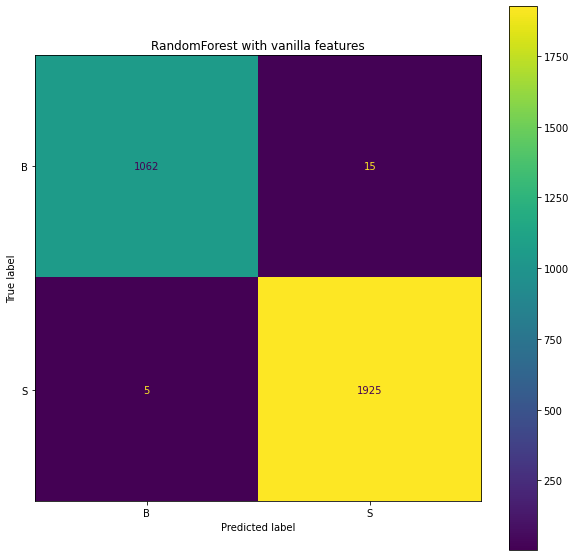

precision_score : 0.9953139643861293
recall_score:  0.9860724233983287
f1_score:  0.9906716417910447
accuracy_score : 0.9933488526770868
 There are 16 features that are highly correlated
numpy fit_transform
Train features :  (12024, 199)
Train labels :  (12024, 1)
Train features :  (3007, 199)


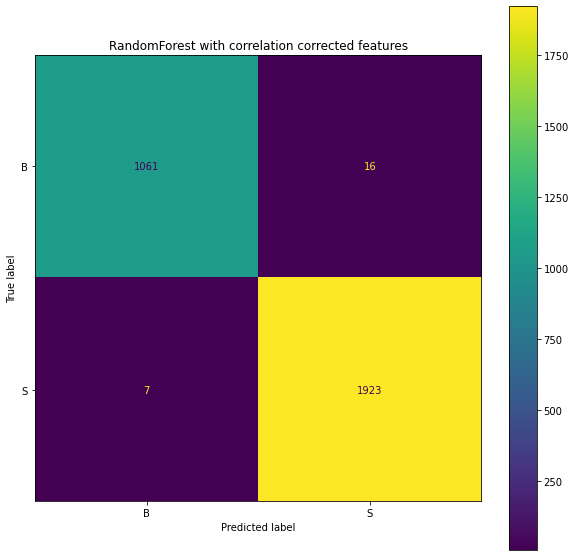

precision_score : 0.9934456928838952
recall_score:  0.9851439182915506
f1_score:  0.9892773892773893
accuracy_score : 0.9923511805786498
numpy fit_transform
Train features :  (12024, 128)
Train labels :  (12024, 1)
Train features :  (3007, 128)


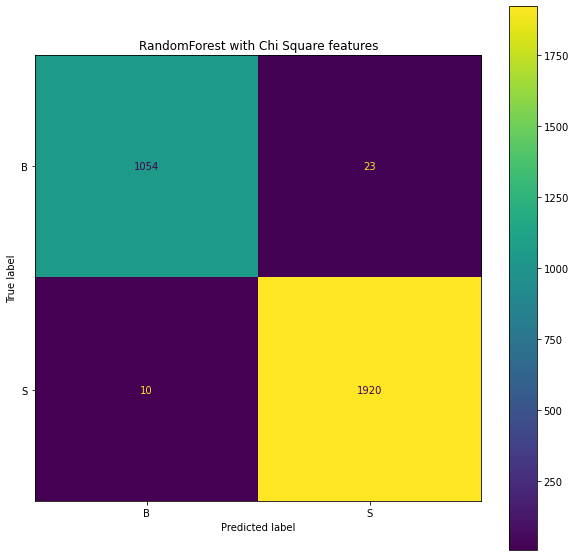

precision_score : 0.9906015037593985
recall_score:  0.978644382544104
f1_score:  0.9845866417561887
accuracy_score : 0.9890256069171932
numpy fit_transform
Train features :  (12024, 215)
Train labels :  (12024, 1)
Train features :  (3007, 215)


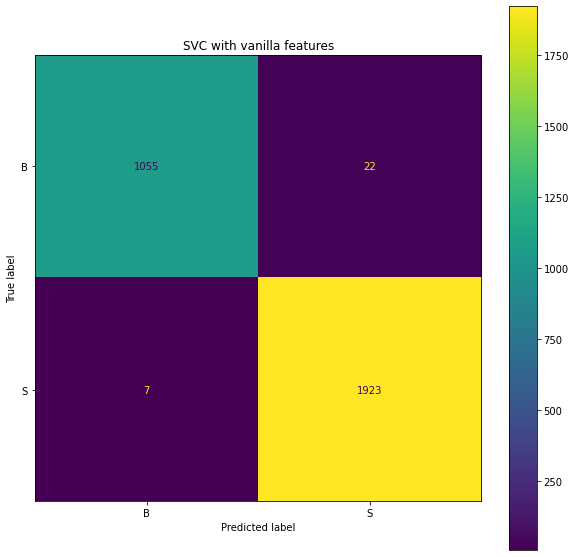

precision_score : 0.9934086629001884
recall_score:  0.9795728876508821
f1_score:  0.9864422627395981
accuracy_score : 0.9903558363817758
 There are 16 features that are highly correlated
numpy fit_transform
Train features :  (12024, 199)
Train labels :  (12024, 1)
Train features :  (3007, 199)


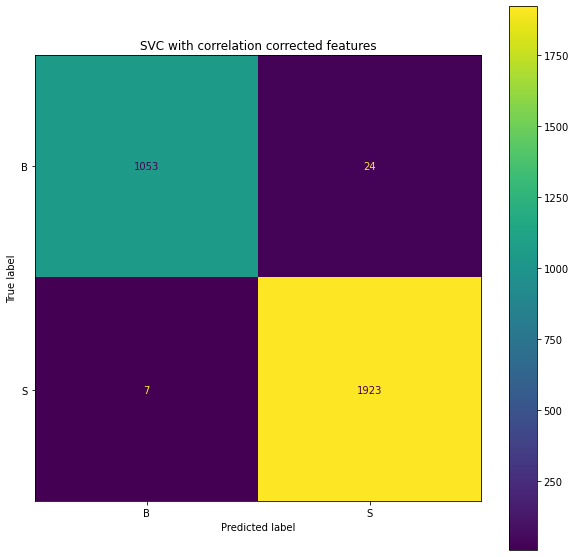

precision_score : 0.9933962264150943
recall_score:  0.9777158774373259
f1_score:  0.9854936827328029
accuracy_score : 0.9896907216494846
numpy fit_transform
Train features :  (12024, 128)
Train labels :  (12024, 1)
Train features :  (3007, 128)


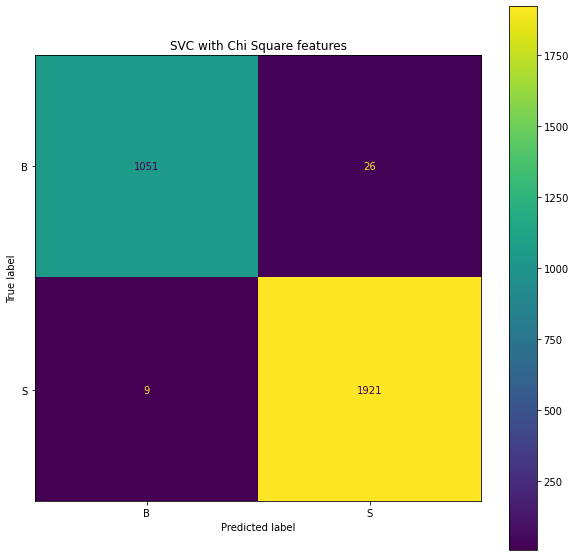

precision_score : 0.9915094339622641
recall_score:  0.9758588672237697
f1_score:  0.9836218998596162
accuracy_score : 0.9883604921849019


,RandomForest with vanilla features,RandomForest with correlation corrected features,RandomForest with Chi Square features,SVC with vanilla features,SVC with correlation corrected features,SVC with Chi Square features
Precision,0.995314,0.993446,0.990602,0.993409,0.993396,0.991509
Recall,0.986072,0.985144,0.978644,0.979573,0.977716,0.975859
F1,0.990672,0.989277,0.984587,0.986442,0.985494,0.983622
Accuracy,0.993349,0.992351,0.989026,0.990356,0.989691,0.988360


In [7]:
res = mds_pipelines.rf_vanilla_clf_pipeline.fit(train_x, train_y)
y_pred = res.predict(test_x)
Evaluator.confusion_matrix(y_true=test_y, y_pred=y_pred, title="RandomForest with vanilla features")
evaluation_results.update(
    Evaluator.classification_report(y_true=test_y, y_pred=y_pred, title="RandomForest with vanilla features")
)

res = mds_pipelines.rf_corr_engd_clf_pipeline.fit(train_x, train_y)
y_pred = res.predict(test_x)
Evaluator.confusion_matrix(y_true=test_y, y_pred=y_pred, title="RandomForest with correlation corrected features")
evaluation_results.update(
    Evaluator.classification_report(y_true=test_y, y_pred=y_pred, title="RandomForest with correlation corrected features")
)

res = mds_pipelines.rf_chi_square_engd_clf_pipeline.fit(train_x, train_y)
y_pred = res.predict(test_x)
Evaluator.confusion_matrix(y_true=test_y, y_pred=y_pred, title="RandomForest with Chi Square features")
evaluation_results.update(
    Evaluator.classification_report(y_true=test_y, y_pred=y_pred, title="RandomForest with Chi Square features")
)


# ------------------------------------------------------------------------------------------------------------------

res = mds_pipelines.svc_vanilla_clf_pipeline.fit(train_x, train_y)
y_pred = res.predict(test_x)
Evaluator.confusion_matrix(y_true=test_y, y_pred=y_pred, title="SVC with vanilla features")
evaluation_results.update(
    Evaluator.classification_report(y_true=test_y, y_pred=y_pred, title="SVC with vanilla features")
)

res = mds_pipelines.svc_corr_engd_clf_pipeline.fit(train_x, train_y)
y_pred = res.predict(test_x)
Evaluator.confusion_matrix(y_true=test_y, y_pred=y_pred, title="SVC with correlation corrected features")
evaluation_results.update(
    Evaluator.classification_report(y_true=test_y, y_pred=y_pred, title="SVC with correlation corrected features")
)

res = mds_pipelines.svc_chi_square_engd_clf_pipeline.fit(train_x, train_y)
y_pred = res.predict(test_x)
Evaluator.confusion_matrix(y_true=test_y, y_pred=y_pred, title="SVC with Chi Square features")
evaluation_results.update(
    Evaluator.classification_report(y_true=test_y, y_pred=y_pred, title="SVC with Chi Square features")
)

evaluation_results_df = pd.DataFrame(evaluation_results, index=["Precision", "Recall", "F1", "Accuracy"])
evaluation_results_df.style.highlight_max(color='red', axis=1)

## Create Test data

In [98]:
test_x["class"]=test_y

In [99]:
test_x

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
5311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1
1426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1
6067,1,1,1,1,1,1,0,1,1,1,...,1,1,0,0,1,0,0,0,0,0
3424,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14318,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0
2380,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4507,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6231,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [101]:
for i in range(100):
    df = test_x.sample()
    df.to_csv(f"data/samples/{i}.csv")

In [103]:
r = mds_pipelines.rf_corr_engd_clf_pipeline.predict(df)

Train features :  (1, 199)


In [111]:
df["class"].values[0]

1

In [106]:
r[0] 

1